<a href="https://colab.research.google.com/github/EddyGiusepe/Perceptron_with_Python/blob/main/The_Perceptron_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">O Perceptron: Regressão Logística</h2>



Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro




Este estudo foi baseado:

* No canal de YouTube do [SENSIO](https://www.youtube.com/watch?v=Q9AVeC9bNdc&list=PLkgbkukKg_NpdJPhhHbemaWHNQCY-lmh1&index=7).

![](https://estatsite.com.br/wp-content/uploads/2018/08/1-3.jpg)

# Regressão Logística

No Script anterior aprendimos a utilizar o Perceptron para uma task de `Classificação Binâria`. Para isso usamos uma função de ativação de tipo `Step` (que nos dá uma saída de $0$ ou $1$) e treinamos o Perceptron mediante o algoritmo de `Descenso por Gradiente` utilizando o `Erro quadrático médio` (MSE) como função de perda. No entanto, não sempre estaremos interessados simplesmente em conhecer se um elemento em particular pertence a uma classe ou não, senão também o Grau de confiança com o que nosso modelo fornece cada predição. Para isso precisamos que nosso Perceptron seja capaz de fornecer uma `PROBABILIDADE` à saída. Esta saída será um valor entre $0$ e $1$ (a diferença do modelo anterior em que a saída era $0$ ou $1$)sendo $0$ a absoluta certeza de que o elemento em questão não pertence à classe que nos interessa e $1$ a absoluta certeza de que sim pertence. Um valor intermediário uma baixa segurança por parte do modelo (podemos utilizar está informação para melhorar o algoritmo adicionando mais Dados similares). Um valor de $0.5$ indicará que nosso modelo não tem nem a mais remota ideia de como classificar o elemento utilizado como entrada. 

# Função de Ativação

Aqui, seguiremos trabalhando com o mesmo modelo de `Perceptron`.

![](https://www.researchgate.net/profile/Shibani_Singh2/publication/321141639/figure/fig2/AS:572731935727616@1513561342872/Schematic-of-Rosenblatts-perceptron.png)




A principal diferença é que neste modelo de `Regressão Logística`, utilizaremos uma função de Ativação conhecida como <font color="yellow">Sigmoid</font>:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Esta função recebirá uma entrada e entregará uma probabilidade (um valor entre $0$ e $1$).

In [8]:
# Carregamos as nossas bibliotecas

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [2]:
# Criamos a nossa função

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

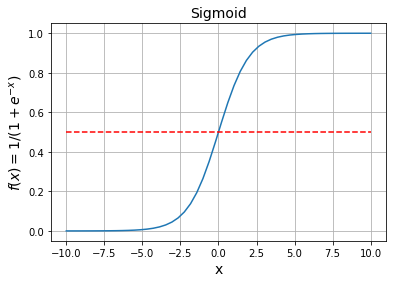

In [3]:
x = np.linspace(-10, 10)
y = 1. / (1. + np.exp(-x))

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('$f(x) = 1/(1 + e^{-x})$', fontsize=14)
plt.title('Sigmoid', fontsize=14)
plt.plot(x, np.full(len(x), 0.5), '--r')
plt.show()


Como podemos observar, os valores muito negativos saturam a um valor $0$, enquanto que os valores muito positivos saturam a um valor $1$.  

# Função de Perda

Poderíamos tentar treinar nosso modelo `Regresión logísitca` com a função de perda que já conhecemos, `MSE`, e funcionaria muito bem, pois estamos forçando a saída a receber o valor $0$ ou $1$ baseado no ground truth. No entanto, vamos a introduzir uma nova função de perda muito utilizada quando trabalhamos com modelos probabilísticos já que fornecem como resultado um melhor processo de Optimização. Esta função é conhecida como `Binary Cross Entropy`, ou também com o nome de `Log Loss`:

$$ J(\mathbf{w}) = - \frac{1}{N} \sum^{N}_{j=1} \left[ y^{(j)} log(\hat{y}^{(j)}) + (1-y^{(j)})log(1-\hat{y}^{(j)})\right] $$


Como podemos observar, quando o ground seja $0$ só ficará o segundo termo, $log(1-\hat{y})$. Neste caso, se a saída do modelo é correta e nos dá um valor perto a $0$ obteremos um valor da função de perda pequeno. No entanto, se o modelo errar e dá uma probabilidade alta, o valor da função de perda será muito grande indicando um alto erro (observa o signo negativo ao princípio da experessão, necessário já que o limite quando $x$ tende a $0$ do logaritmo é $- \infty$ porém necessitamos valores positivos para indicar error). O mesmo se aplica ao caso contrário no que o *ground truth* seja $1$, porém com o primeiro termo.  

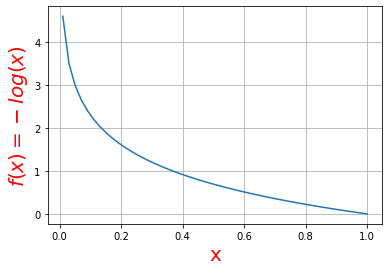

In [4]:
x = np.linspace(0.01, 1)
y =  -np.log(x)

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=20, c='r')
plt.ylabel('$f(x) = - log(x)$', fontsize=20, c='r')
plt.show()

O motivo pelo qual usamos logaritmos na função de perda é porque está relacionado com o conceito de `ENTROPIA`, uma medida de grau de confiança associado a uma distribuição de probabilidade (fazer [click aqui](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) para mais detalhes).

A função de perda não só serve para calcular o erro de nosso modelo, senão também para seu treinamento. Para isso precisamos calcular a derivada da função de perda com respeito aos pesos de nosso modelo. Neste caso é um pouco mais complicado que para a `MSE` (o que já estudamos em aulas passadas), mas com um pouco de cálculo podemos obter a seguinte expressão:

$$ \frac{\partial J}{\partial w_i} =  \frac{1}{N} \sum^{N}_{j=1} (\sigma(\mathbf{w} \cdot \mathbf{x}^{(i)}) - y^{(i)})x^{(j)}_i $$


Esta expressão é a mesma que obtemos ao calcular a derivada da MSE para o caso do `PERCEPRON` com função de Ativação Linear que já usamos para tarefas de `REGRESSÃO`.



# Implementação

Aqui vamos melhorar a implementação do `Perceptron` das aulas passadas, agora, para que seja capaz de funcionar como um modelo de `REGRESSÃO LOGÍSTICA`.

In [5]:
# Funções de Perda

def mse(y, y_hat): # Mean Square Error
    return np.mean((y_hat - y)**2)

def bce(y, y_hat): # Binary Cross Entropy 
    return - np.mean(y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat))


# Funções de Ativação

def linear(x):
    return x

def step(x):
    return x > 0

def sigmoid(x):
  return 1 / (1 + np.exp(-x))


# Perceptron

class Perceptron():
  def __init__(self, size, activation, loss):
    self.w = np.random.randn(size) 
    self.ws = []
    self.activation = activation
    self.loss = loss
    
  def __call__(self, w, x): # x --> Inputs e w --> pesos
    return self.activation(np.dot(x, w)) 

  def fit(self, x, y, epochs, lr):
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(epochs):
        # Batch Gradient Descent
        y_hat = self(self.w, x)  
        # Função de Perda 
        l = self.loss(y, y_hat)
        # Derivadas
        dldh = (y_hat - y)
        dhdw = x
        dldw = np.dot(dldh, dhdw)
        # Atualizar pesos
        self.w = self.w - lr*dldw
        # Guardar pesos para animación
        self.ws.append(self.w.copy())

Temos diferentes Funções de Perda e Funções de Ativação, simplesmente passaremos ao Perceptron quais utilizar. Desta maneira nosso modelo será capaz de resolver tanto tarefas de `REGRESSÃO` como de `CLASSIFICAÇÃO BINÂRIA`.

```
🤓 Para fazer uma implementação todavia mais versátil podemos provar em mudar a função fit para que funcione em modo mini-batch.
```


# Treinamento

Aqui vamos a utilizar nosso `PERCEPTRON` para a tarefa de CLASSIFICAÇÃO BINÂRIA no Dataset Iris. 

In [9]:
# Nosso Dataset

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

X.shape, y.shape

((150, 2), (150,))

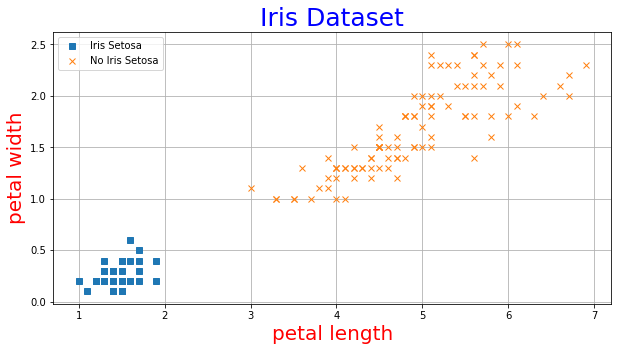

In [16]:
fig = plt.figure(figsize=(10, 5))

plt.plot(X[y==1, 0], X[y==1, 1], 's', label="Iris Setosa")
plt.plot(X[y==0, 0], X[y==0, 1], 'x', label="No Iris Setosa")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=20, c='r')
plt.ylabel('petal width', fontsize=20, c='r')
plt.title("Iris Dataset", fontsize=25, c='b')
plt.show()


In [17]:
np.random.seed(42)

perceptron = Perceptron(3, sigmoid, bce)
epochs, lr = 20, 0.01
perceptron.fit(X, y, epochs, lr)

In [18]:
from matplotlib import animation, rc
from matplotlib.colors import ListedColormap


custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
rc('animation', html='html5')

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0, 5, 0, 2], label="Iris Setosa"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = animation.FuncAnimation(fig, plot, frames=epochs, interval=200)
plt.close()
anim

Observamos que o modelo é capaz de convergir a uma solução ótima que separa as duas classes.

### <font color="yellow">Agora podemos usar nosso modelo treinado para atribuir uma probabilidade de que uma flor seja do tipo Iris Setosa a partir do comprimento e a largura de seus pétalos.</font>

In [19]:
w = perceptron.ws[-1]
w

array([ 3.1121193 , -1.14317047, -0.70370935])

In [20]:
x_new = [1, 2, 0.5]

y_pred = perceptron(w, x_new)
y_pred # Iris Setosa

0.6163120194730394

In [21]:
x_new = [1, 1, 0.5]

y_pred = perceptron(w, x_new)
y_pred # Iris Setosa

0.8343939887777257

In [22]:
x_new = [1, 3, 0.5]

y_pred = perceptron(w, x_new)
y_pred # No Iris Setosa

0.33866551968712205

In [23]:
x_new = [1, 4, 0.5]

y_pred = perceptron(w, x_new)
y_pred # No Iris Setosa

0.14034623285805609

## <font color="orange">O modelo tem mais certeza quanto mais nos afastamos da fronteira de decissão (valores mais pertos de $0$ ou $1$). No entanto, quanto mais perto da fronteira de decissão nos encontramos, o modelo tem menos certeza fornecendo resultados mais pertos a $0.5$. Como atribuímos uma classe ou outra? ... o mais comum é decidir um VALOR DE CORTE, `threshold`, a partir do qual atribuiremos uma classe ou outra. O valor mais comum é $0.5$ (qualquer valor por acima será a classe em questão). Este `threshold` pode ser modificado dependendo da tarefa.</font>